In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/crop.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0
1,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0
2,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0
3,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0
4,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,1,24,1997,2,3,300.0,200.0
1,1,24,1998,2,3,400.0,200.0
2,1,24,1999,2,3,439.0,294.0
3,1,24,2000,2,3,520.0,297.0
4,1,24,2001,2,3,307.0,213.0
...,...,...,...,...,...,...,...
82560,32,470,2013,3,1,516.0,1274.0
82561,32,470,2013,5,1,302274.0,730136.0
82562,32,470,2014,0,1,264.0,721.0
82563,32,470,2014,3,1,306.0,801.0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,6]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'neg_mean_squared_error'
cv_scoring = 'r2'


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=cv_k, shuffle=True)

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
import time
now = time.time()
est_best = RandomForestRegressor(n_estimators = 10, n_jobs=-1)
est_best.fit(X_train, y_train)
scores = cross_val_score(est_best, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.4f (+/- %0.4f)"% (scores.mean(),scores.std()*2))
after = time.time()
print("time: {:5.2f} s".format(after-now))

Accuracy: 0.9601 (+/- 0.0270)
time: 10.88 s


In [ ]:
y_pred = est_best.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9744864106655372

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


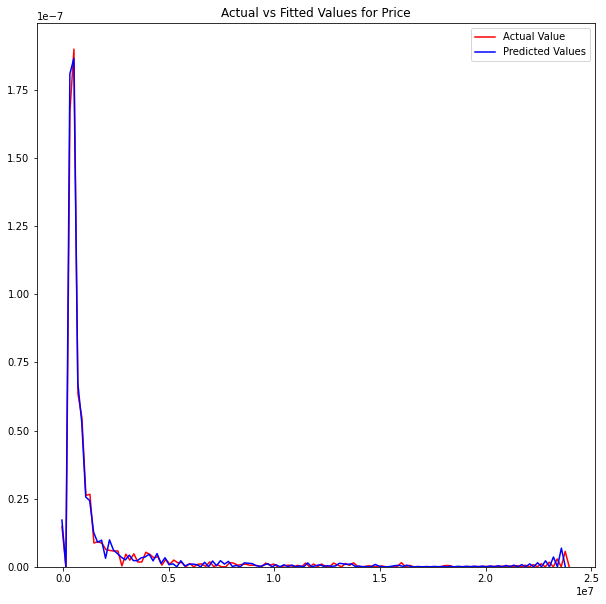

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 10))
ax = sns.distplot(y_test.values, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

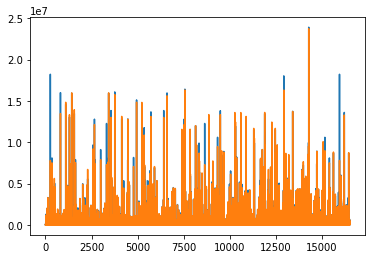

In [ ]:
plt.plot(y_test.values)
plt.plot(y_pred)

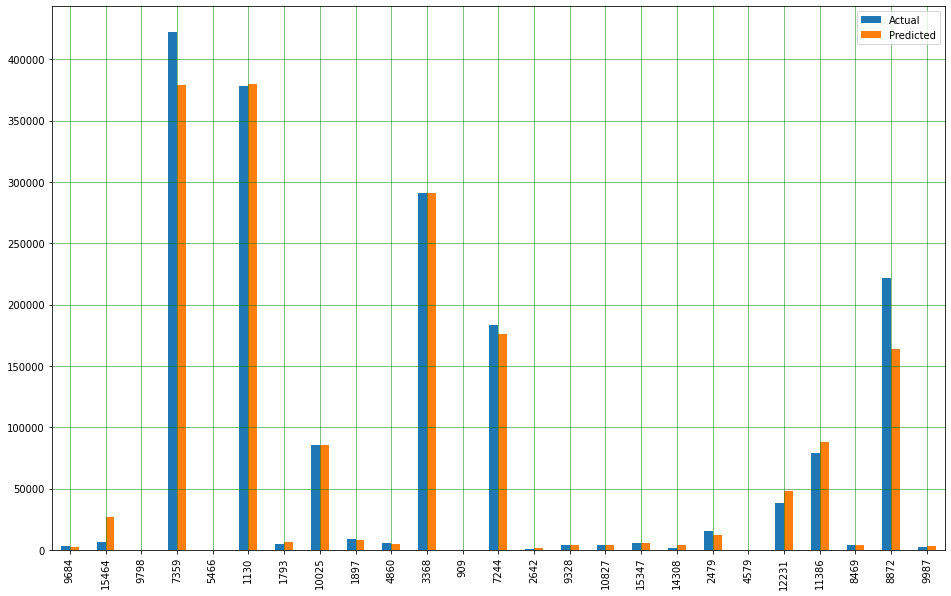

In [ ]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
df1 = df1.sample(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
df_re = pd.read_csv('/content/crop.csv', sep=',', encoding = 'utf-8-sig')
lel = preprocessing.LabelEncoder()
lel.fit(df_re['State_Name'])
le_state_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_state_mapping)
lel.fit(df_re['District_Name'])
le_district_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_district_mapping)
lel.fit(df_re['Season'])
le_season_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_season_mapping)
lel.fit(df_re['Crop'])
le_crop_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_crop_mapping)


{'Andaman and Nicobar Islands': 0, 'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'Chandigarh': 5, 'Chhattisgarh': 6, 'Dadra and Nagar Haveli': 7, 'Goa': 8, 'Gujarat': 9, 'Haryana': 10, 'Himachal Pradesh': 11, 'Jammu and Kashmir ': 12, 'Jharkhand': 13, 'Karnataka': 14, 'Kerala': 15, 'Madhya Pradesh': 16, 'Maharashtra': 17, 'Manipur': 18, 'Meghalaya': 19, 'Mizoram': 20, 'Nagaland': 21, 'Odisha': 22, 'Puducherry': 23, 'Punjab': 24, 'Rajasthan': 25, 'Sikkim': 26, 'Tamil Nadu': 27, 'Telangana ': 28, 'Tripura': 29, 'Uttar Pradesh': 30, 'Uttarakhand': 31, 'West Bengal': 32}
{'24 PARAGANAS NORTH': 0, '24 PARAGANAS SOUTH': 1, 'ADILABAD': 2, 'AGAR MALWA': 3, 'AGRA': 4, 'AHMADABAD': 5, 'AHMEDNAGAR': 6, 'AIZAWL': 7, 'AJMER': 8, 'AKOLA': 9, 'ALAPPUZHA': 10, 'ALIGARH': 11, 'ALIRAJPUR': 12, 'ALLAHABAD': 13, 'ALMORA': 14, 'ALWAR': 15, 'AMBALA': 16, 'AMBEDKAR NAGAR': 17, 'AMETHI': 18, 'AMRAVATI': 19, 'AMRELI': 20, 'AMRITSAR': 21, 'AMROHA': 22, 'ANAND': 23, 'ANANTAPUR': 24, 'ANANT

In [ ]:
print(le_district_mapping["BATHINDA"])
print(le_state_mapping["Punjab"])
print(le_season_mapping["Kharif     "])
print(le_crop_mapping["Wheat"])


68
24
1
3


In [ ]:
#Prediction of Bhatinda Punjab
re = np.array([24,68,2019,2,3,400])
a = est_best.predict(re.reshape(1,-1))
print("Crop Yield:",a[0],"Qunital")
sp = (a[0]*5.4/3.45)
print("Total Stubble Produced:",sp,"Qunital")

Crop Yield: 156927.1 Qunital
Total Stubble Produced: 245625.02608695652 Qunital
